# Asistencia - Avances Proyecfo Final

### Juan M. González-Campo
### Lourdes Saavedra
### Manuel Rodas
### Wilfredo Gallegos
### Dolan Cuellar

## Carga de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('DelayedFlights.csv')

## Limpieza de Datos

In [3]:

df = df.iloc[:, 1:]  # Eliminar la primera columna sin nombre
print(df.head())



   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4   1829.0        1755   1959.0   
4  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0          0   
1        1000            WN       3231  ...    5.0     10.0          0   
2         750            WN        448  ...    3.0     17.0          0   
3        1925            WN       3920  ...    3.0     10.0          0   
4        2110            WN        378  ...    4.0     10.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                 N         0           NaN          NaN   

In [4]:
# convertir a tipo de dato entero o bool
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['DayofMonth'] = df['DayofMonth'].astype(int)
df['DayOfWeek'] = df['DayOfWeek'].astype(int)
df['Cancelled'] = df['Cancelled'].astype(bool)
df['Diverted'] = df['Diverted'].astype(bool)


In [5]:
# Eliminar duplicados

df.drop_duplicates(inplace=True)

null_counts = df.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna:\n", null_counts)



Cantidad de valores nulos por columna:
 LateAircraftDelay    689270
SecurityDelay        689270
NASDelay             689270
WeatherDelay         689270
CarrierDelay         689270
ActualElapsedTime      8387
AirTime                8387
ArrDelay               8387
ArrTime                7110
TaxiIn                 7110
TaxiOut                 455
CRSElapsedTime          198
TailNum                   5
UniqueCarrier             0
Cancelled                 0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
Diverted                  0
CancellationCode          0
Distance                  0
FlightNum                 0
Dest                      0
Origin                    0
DepDelay                  0
Month                     0
CRSArrTime                0
Year                      0
dtype: int64


In [6]:
# revisa si es mas de la mitad de los datos y si si, elimianrlos
df.dropna(thresh=df.shape[0]/2, axis=1, inplace=True)
# mostrar columna eliminadas
print("Columnas eliminadas por tener mas de la mitad de valores nulos:\n", null_counts[null_counts > df.shape[0]/2])

print(df.head())


Columnas eliminadas por tener mas de la mitad de valores nulos:
 Series([], dtype: int64)
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4   1829.0        1755   1959.0   
4  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0      False   
1        1000            WN       3231  ...    5.0     10.0      False   
2         750            WN        448  ...    3.0     17.0      False   
3        1925            WN       3920  ...    3.0     10.0      False   
4        2110            WN        378  ...    4.0     10.0      False   

   CancellationCode  Diverted  Carrier

In [7]:
# si la celda esta vacia en las columnas  LateAircraftDelay, ecurityDelay, NASDelay, WeatherDelay, CarrierDelay cambiar a 0
df['LateAircraftDelay'].fillna(0, inplace=True)
df['SecurityDelay'].fillna(0, inplace=True)
df['NASDelay'].fillna(0, inplace=True)
df['WeatherDelay'].fillna(0, inplace=True)
df['CarrierDelay'].fillna(0, inplace=True)
null_counts = df.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna:\n", null_counts)



Cantidad de valores nulos por columna:
 ArrDelay             8387
AirTime              8387
ActualElapsedTime    8387
TaxiIn               7110
ArrTime              7110
TaxiOut               455
CRSElapsedTime        198
TailNum                 5
Cancelled               0
CancellationCode        0
Dest                    0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
Distance                0
Year                    0
Origin                  0
DepDelay                0
Month                   0
FlightNum               0
UniqueCarrier           0
CRSArrTime              0
CRSDepTime              0
DepTime                 0
DayOfWeek               0
DayofMonth              0
LateAircraftDelay       0
dtype: int64


In [8]:
#Eliminar las filas con valores nulos en ArrTime, CRSArrTime, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, TaxiIn, TaxiOut
df.dropna(subset=['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut'], inplace=True)
null_counts = df.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna:\n", null_counts)

Cantidad de valores nulos por columna:
 TailNum              3
Year                 0
DepDelay             0
SecurityDelay        0
NASDelay             0
WeatherDelay         0
CarrierDelay         0
Diverted             0
CancellationCode     0
Cancelled            0
TaxiOut              0
TaxiIn               0
Distance             0
Dest                 0
Origin               0
ArrDelay             0
Month                0
AirTime              0
CRSElapsedTime       0
ActualElapsedTime    0
FlightNum            0
UniqueCarrier        0
CRSArrTime           0
ArrTime              0
CRSDepTime           0
DepTime              0
DayOfWeek            0
DayofMonth           0
LateAircraftDelay    0
dtype: int64


## EDA

### Transformación de Variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928369 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int32  
 1   Month              int32  
 2   DayofMonth         int32  
 3   DayOfWeek          int32  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          bool   
 22  CancellationCode   object 
 23  Diverted           bool   
 24  CarrierDelay       float64
 25  WeatherDelay       floa

Transformaciones de variables

In [10]:
# Modificar tipos y crear columna de fecha
df['Cancelled'] = df['Cancelled'].astype('category')
df['FlightNum'] = df['FlightNum'].astype('object')
df['TailNum'] = df['TailNum'].astype('object')
df['flightDate'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['DayofMonth'].astype(str)
df["DepTime"] = df["DepTime"].astype(str)
df["CRSDepTime"] = df["CRSDepTime"].astype(str)
df["ArrTime"] = df["ArrTime"].astype(str)
df["CRSArrTime"] = df["CRSArrTime"].astype(str)
df["Month"] = df["Month"].astype('category')
df["DayofMonth"] = df["DayofMonth"].astype('category')
df["DayOfWeek"] = df["DayOfWeek"].astype('category')
df["Year"] = df["Year"].astype('category')
df['flightDate'] = pd.to_datetime(df['flightDate'])
df["UniqueCarrier"] = df["UniqueCarrier"].astype('category')
df["Diverted"] = df["Diverted"].astype('category')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928369 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Year               category      
 1   Month              category      
 2   DayofMonth         category      
 3   DayOfWeek          category      
 4   DepTime            object        
 5   CRSDepTime         object        
 6   ArrTime            object        
 7   CRSArrTime         object        
 8   UniqueCarrier      category      
 9   FlightNum          object        
 10  TailNum            object        
 11  ActualElapsedTime  float64       
 12  CRSElapsedTime     float64       
 13  AirTime            float64       
 14  ArrDelay           float64       
 15  DepDelay           float64       
 16  Origin             object        
 17  Dest               object        
 18  Distance           int64         
 19  TaxiIn             float64       
 20  TaxiOut            float64   

### Exploración

In [12]:
# Estadísticas descriptivas
print(df.describe())

       ActualElapsedTime  CRSElapsedTime       AirTime      ArrDelay  \
count       1.928369e+06    1.928369e+06  1.928369e+06  1.928369e+06   
mean        1.333059e+02    1.341977e+02  1.082772e+02  4.219988e+01   
min         1.400000e+01   -2.100000e+01  0.000000e+00 -1.090000e+02   
25%         8.000000e+01    8.200000e+01  5.800000e+01  9.000000e+00   
50%         1.160000e+02    1.160000e+02  9.000000e+01  2.400000e+01   
75%         1.650000e+02    1.650000e+02  1.370000e+02  5.600000e+01   
max         1.114000e+03    6.600000e+02  1.091000e+03  2.461000e+03   
std         7.206010e+01    7.123342e+01  6.864264e+01  5.678474e+01   

           DepDelay      Distance        TaxiIn       TaxiOut  CarrierDelay  \
count  1.928369e+06  1.928369e+06  1.928369e+06  1.928369e+06  1.928369e+06   
mean   4.309169e+01  7.649487e+02  6.811386e+00  1.821733e+01  1.240739e+01   
min    6.000000e+00  1.100000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.200000e+01  3.380000e+02  

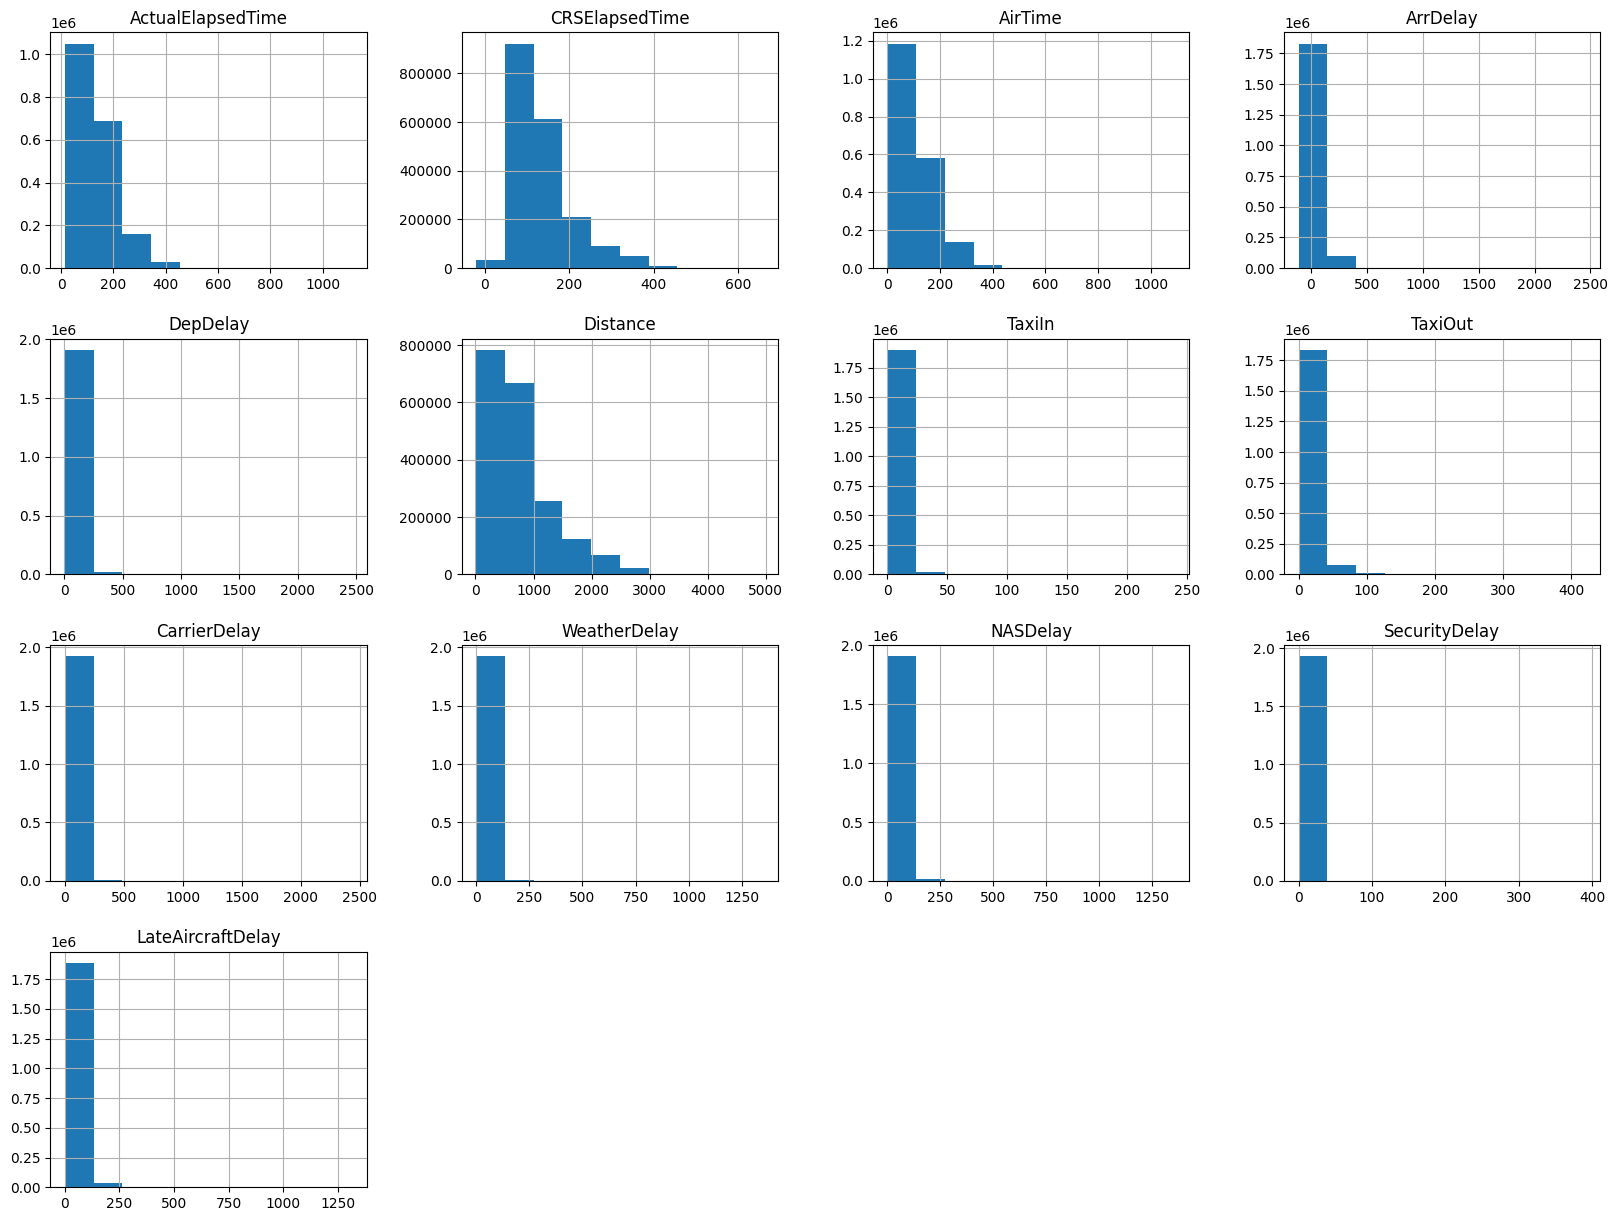

In [13]:
# Plot histograms for numerical columns
df.select_dtypes(include=["float64", "int64"]).hist(figsize=(20, 15))
plt.show()



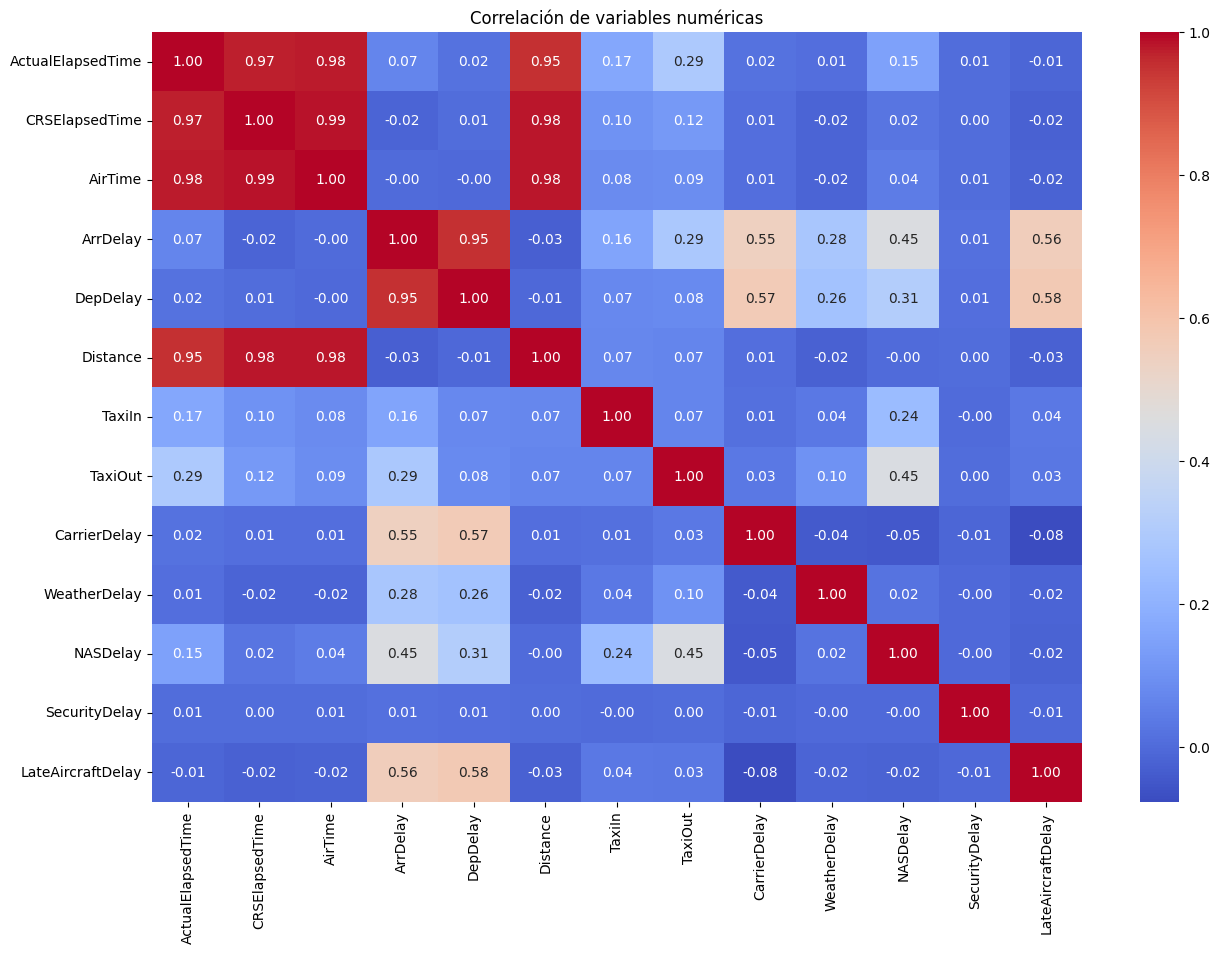

In [14]:
# Correlaciones
plt.figure(figsize=(15, 10))
plt.title("Correlación de variables numéricas")
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



#### Por Aerolínea

<Axes: title={'center': '% de vuelos atrasados por aerolinea'}>

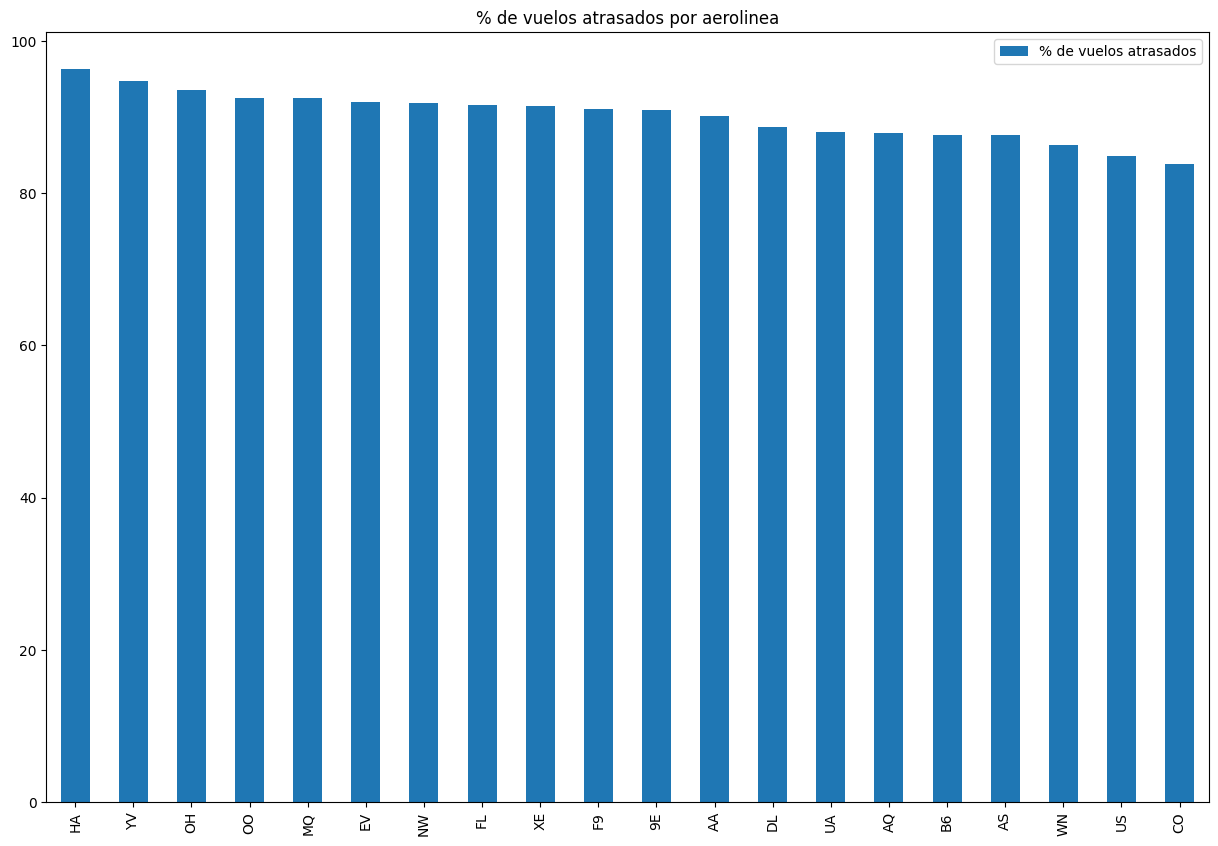

In [15]:
# Porcentaje de vuelos atrasados por aerolinea

aerolineas = {}
for i in df['UniqueCarrier'].unique():
    aerolineas[i] = [df[df['UniqueCarrier'] == i].shape[0], df[(df['UniqueCarrier'] == i) & (df['ArrDelay'] > 0)].shape[0]]

aerolineas = pd.DataFrame(aerolineas, index=['Total', 'Delayed']).T
aerolineas['% de vuelos atrasados'] = aerolineas['Delayed'] / aerolineas['Total'] * 100
aerolineas = aerolineas.sort_values('% de vuelos atrasados', ascending=False)
aerolineas.plot(kind='bar', y='% de vuelos atrasados', figsize=(15, 10), title='% de vuelos atrasados por aerolinea')



<Axes: title={'center': 'Minutos de atraso promedio por aerolínea (Por atraso de salida)'}>

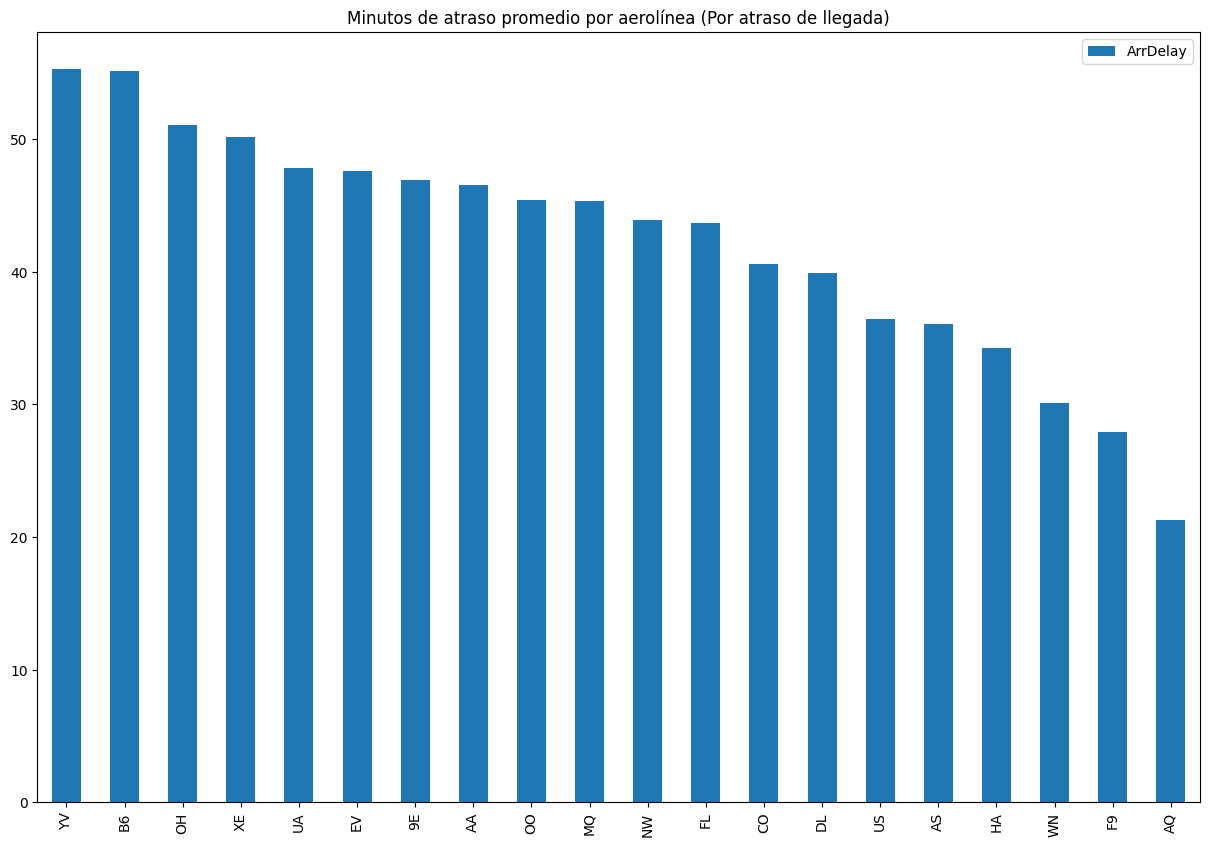

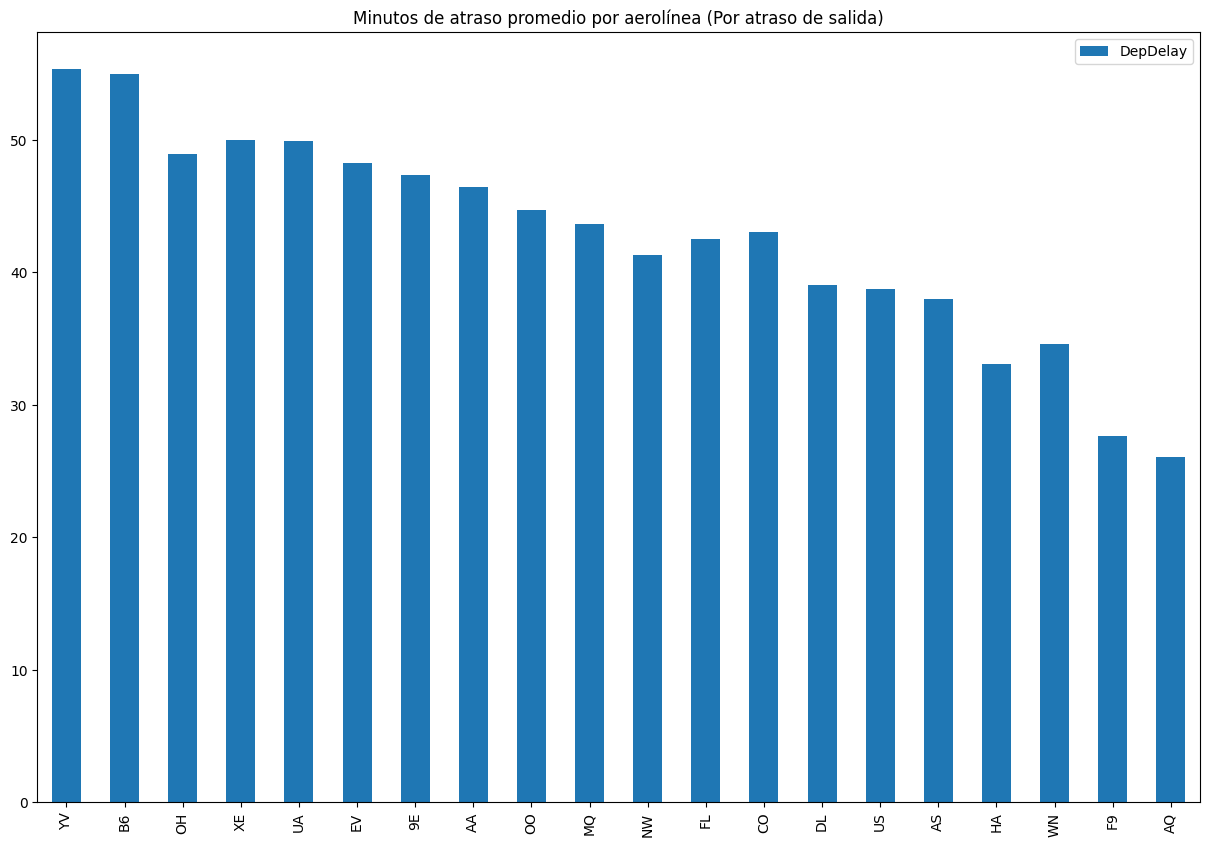

In [16]:
# Atrasos promedio por aerolínea
aerolinea_atrasos_promedio = {}
for i in df['UniqueCarrier'].unique():
    aerolinea_atrasos_promedio[i] = [df[df['UniqueCarrier'] == i]['ArrDelay'].mean(), df[df['UniqueCarrier'] == i]['DepDelay'].mean()]

aerolinea_atrasos_promedio = pd.DataFrame(aerolinea_atrasos_promedio, index=['ArrDelay', 'DepDelay']).T
aerolinea_atrasos_promedio = aerolinea_atrasos_promedio.sort_values('ArrDelay', ascending=False)

aerolinea_atrasos_promedio.plot(kind='bar', y='ArrDelay', figsize=(15, 10), title='Minutos de atraso promedio por aerolínea (Por atraso de llegada)')
aerolinea_atrasos_promedio.plot(kind='bar', y='DepDelay', figsize=(15, 10), title='Minutos de atraso promedio por aerolínea (Por atraso de salida)')



#### Por día de la semana y mes

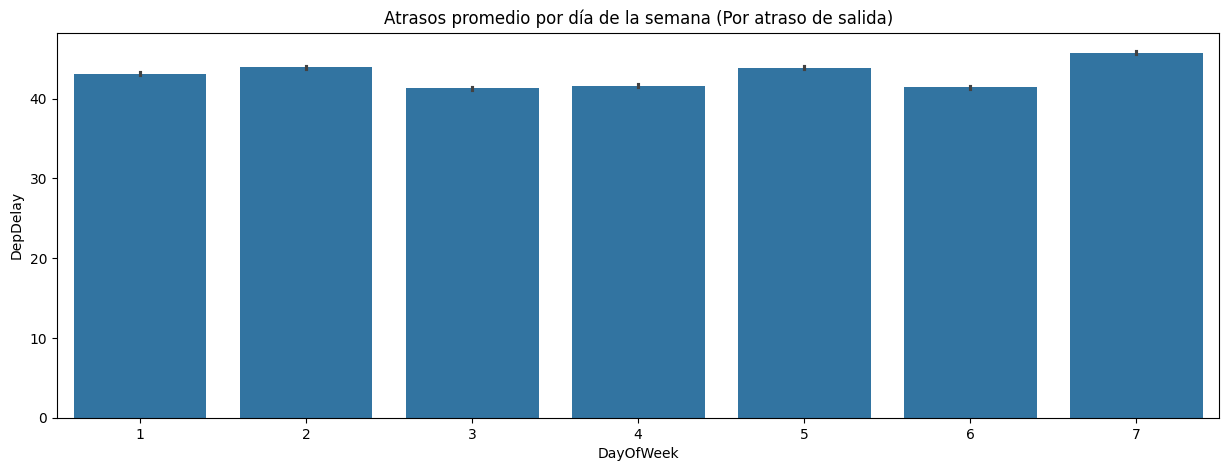

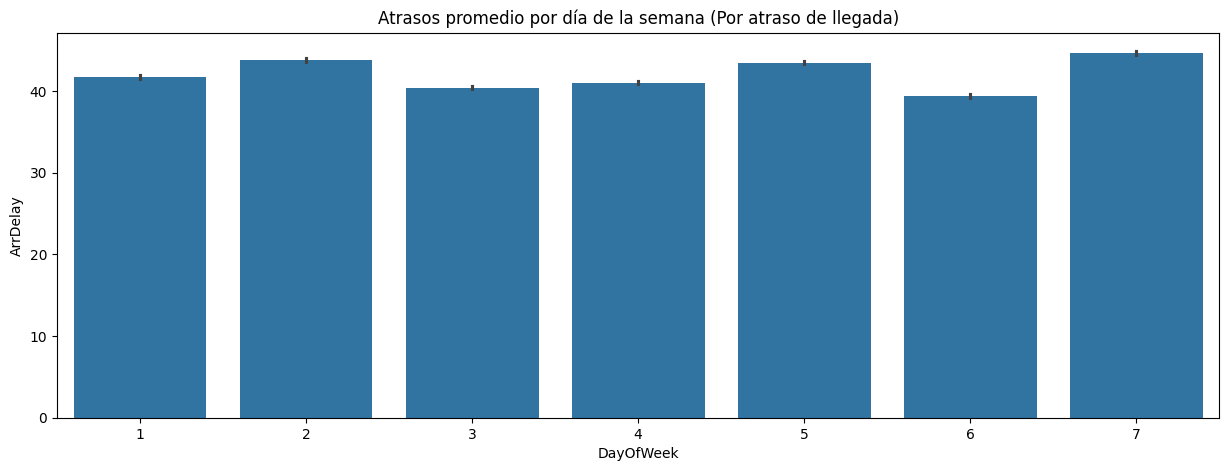

In [17]:
# Atrasos promedio por día de la semana
plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por día de la semana (Por atraso de salida)')
sns.barplot(data=df, x='DayOfWeek', y='DepDelay')
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por día de la semana (Por atraso de llegada)')
sns.barplot(data=df, x='DayOfWeek', y='ArrDelay')
plt.show()



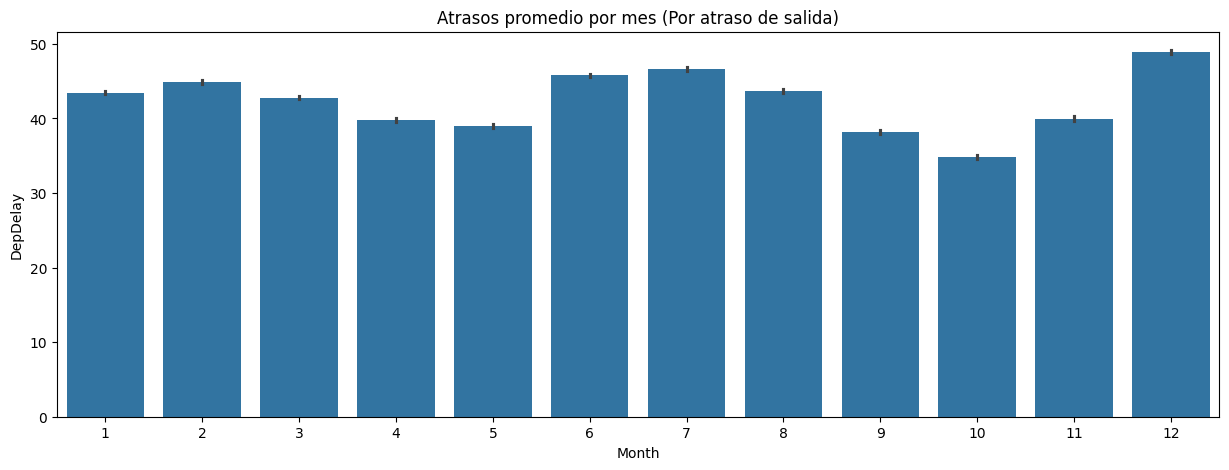

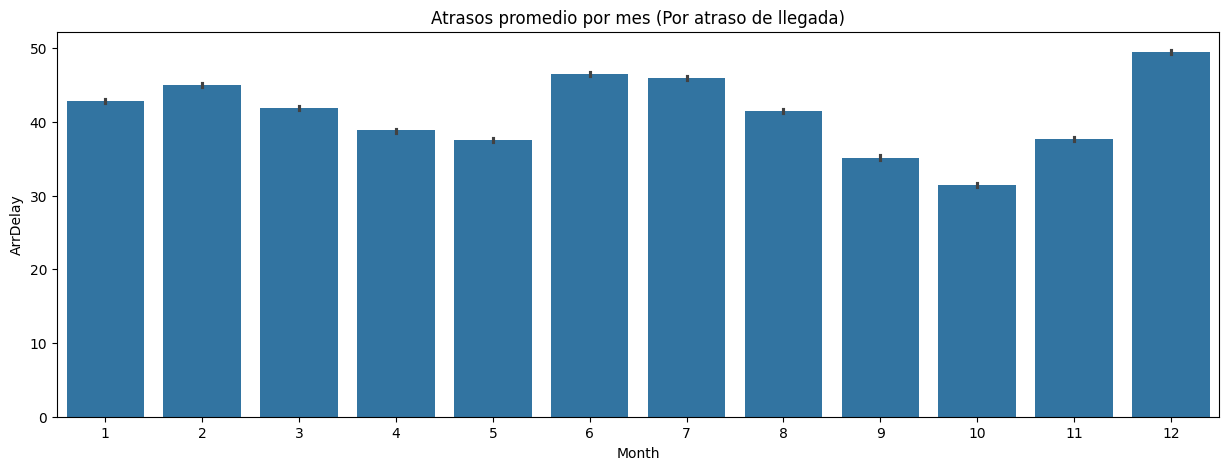

In [18]:
# Atrasos promedio por mes
plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por mes (Por atraso de salida)')
sns.barplot(data=df, x='Month', y='DepDelay')
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Atrasos promedio por mes (Por atraso de llegada)')
sns.barplot(data=df, x='Month', y='ArrDelay')
plt.show()



#### Por aeropuertos

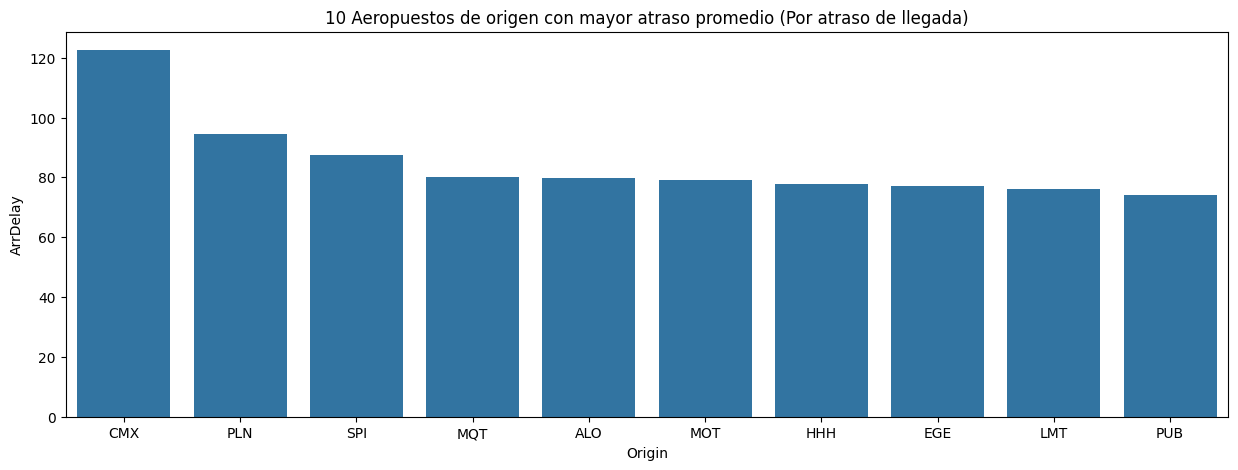

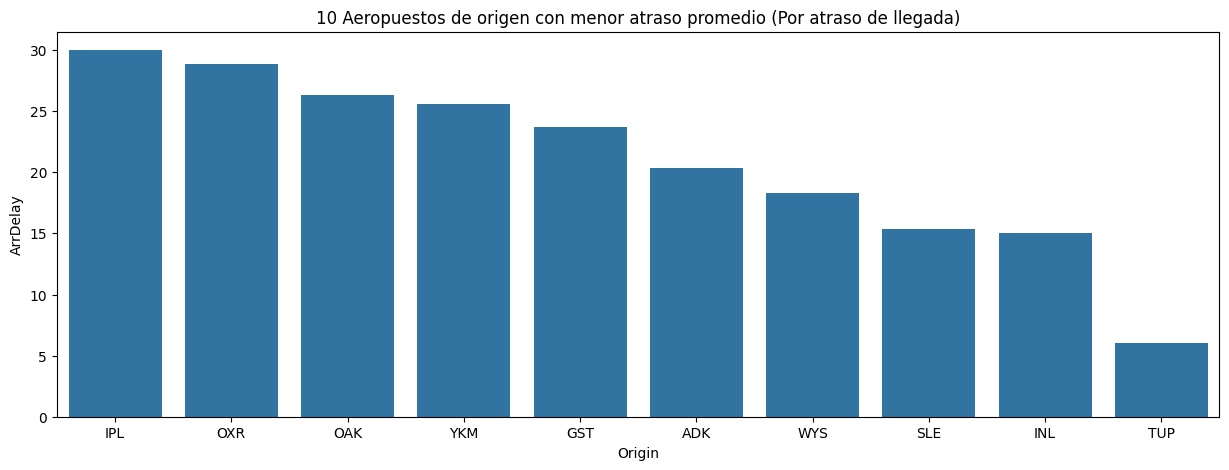

In [19]:
# 10 Aeropuertos de origen con mayor atraso promedio (Por atraso de llegada)

aero_delay_dict = {}
for aero in df['Origin'].unique():
    aero_delay_dict[aero] = df[df['Origin'] == aero]['ArrDelay'].mean()

aero_delay_df = pd.DataFrame(list(aero_delay_dict.items()), columns=['Origin', 'ArrDelay'])
aero_delay_df = aero_delay_df.sort_values(by='ArrDelay', ascending=False)

plt.figure(figsize=(15, 5)) 
plt.title('10 Aeropuestos de origen con mayor atraso promedio (Por atraso de llegada)')
sns.barplot(data=aero_delay_df.head(10), x='Origin', y='ArrDelay')
plt.show()

# 10 Aeropuestos de origen con menor atraso promedio (Por atraso de llegada)
plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de origen con menor atraso promedio (Por atraso de llegada)')
sns.barplot(data=aero_delay_df.tail(10), x='Origin', y='ArrDelay')
plt.show()


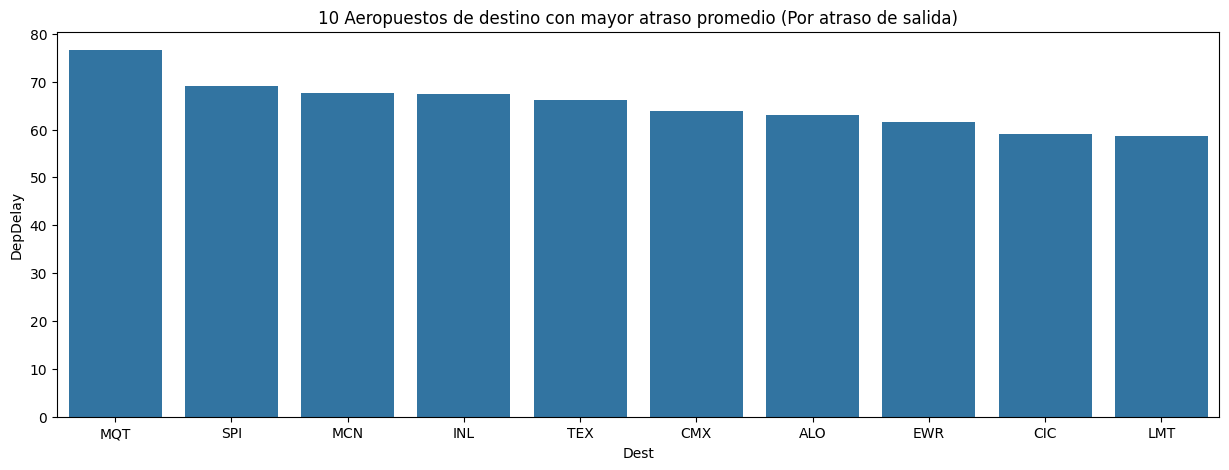

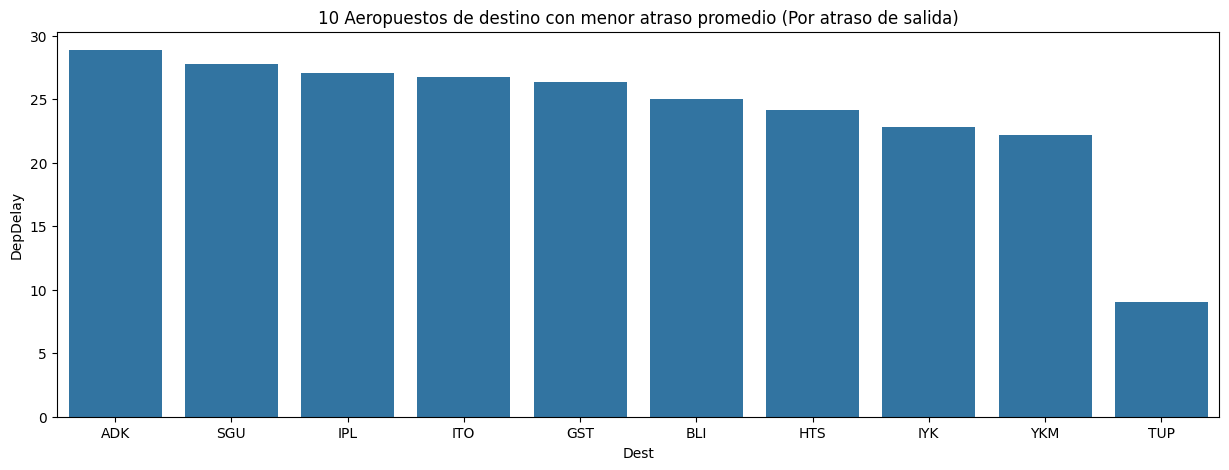

In [20]:
# 10 Aeropuertos de destino con mayor atraso promedio (Por atraso de salida)

aero_delay_dict = {}
for aero in df['Dest'].unique():
    aero_delay_dict[aero] = df[df['Dest'] == aero]['DepDelay'].mean()

aero_delay_df = pd.DataFrame(list(aero_delay_dict.items()), columns=['Dest', 'DepDelay'])
aero_delay_df = aero_delay_df.sort_values(by='DepDelay', ascending=False)   

plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de destino con mayor atraso promedio (Por atraso de salida)')
sns.barplot(data=aero_delay_df.head(10), x='Dest', y='DepDelay')
plt.show()

# 10 Aeropuestos de destino con menor atraso promedio (Por atraso de salida)
plt.figure(figsize=(15, 5))
plt.title('10 Aeropuestos de destino con menor atraso promedio (Por atraso de salida)')
sns.barplot(data=aero_delay_df.tail(10), x='Dest', y='DepDelay')
plt.show()



In [21]:
#Exportar datos limopios
df.to_csv('DelayedFlightsClean.csv', index=False)